# Data Cleansing

In [28]:
# First we import all neccessary libraries and give some of them an alias for easy access
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# Read in the data so every group member can run the notebook on his machine
# (our repo is on github, we therefore have the same file structure)
df = pd.read_csv("../../Data/Transformed/Leo/inventory_management_feature_engineering.csv")
df.shape # Get a first idea about the number of rows and columns of the dataset

(1722, 18)

In [30]:
# Get a first impression of the data
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Product_UID,Weekday
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115,S001_P0001,Saturday
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229,S001_P0002,Saturday
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157,S001_P0003,Saturday
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52,S001_P0004,Saturday
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59,S001_P0005,Saturday


In [31]:
# Analyze the relationship between the variables to discuss which we want to throw out
df[df['Product_UID'] == "S001_P0001"][['Date', 'Units Sold', 'Units Ordered', 'Demand', 'Promotion', 'Discount']]

,Date,Units Sold,Units Ordered,Demand,Promotion,Discount
0,2022-01-01,102,252,115,0,5
100,2022-01-02,71,0,84,0,5
200,2022-01-03,142,229,132,1,15
300,2022-01-04,42,0,67,0,10
400,2022-01-05,129,0,110,1,25
500,2022-01-06,98,308,146,0,0
600,2022-01-07,92,0,87,0,10
700,2022-01-08,96,248,113,1,10
800,2022-01-09,57,0,87,0,10
900,2022-01-10,88,0,99,0,5


In [32]:
# We can see that they order way more than the sell
# Calculate the sums
total_units_sold = df['Units Sold'].sum()
total_units_ordered = df['Units Ordered'].sum()

# Print the results
print(f"Total Units Sold: {total_units_sold}")
print(f"Total Units Ordered: {total_units_ordered}")
print(f"Difference: {total_units_ordered-total_units_sold}")

Total Units Sold: 158696
Total Units Ordered: 183866
Difference: 25170


In [33]:
# Epidemic and seasonality only have one value, Date only has unique values (no patterns possible) thus weekdays are better to analyze patterns, Product ID and Store ID are joined and therefor not needed as single attribute,
# We drop units sold as this would leak the prediction of promotion for the day, instead we should use demand and this is known in advance of the day
# We drop Competitor Pricing as it is highly correlated with the price and has no further use for us
# We also drop Units Ordered as it is correlated with the demand and doesn't improve our performance
df.drop(columns=["Epidemic", "Seasonality", "Date", "Product ID", "Store ID", "Units Sold", 'Competitor Pricing', 'Units Ordered'], inplace=True)

In [34]:
# We want to output the number of missings per attribute
df.isna().sum()

Category             0
Region               0
Inventory Level      0
Price                0
Discount             0
Weather Condition    0
Promotion            0
Demand               0
Product_UID          0
Weekday              0
dtype: int64

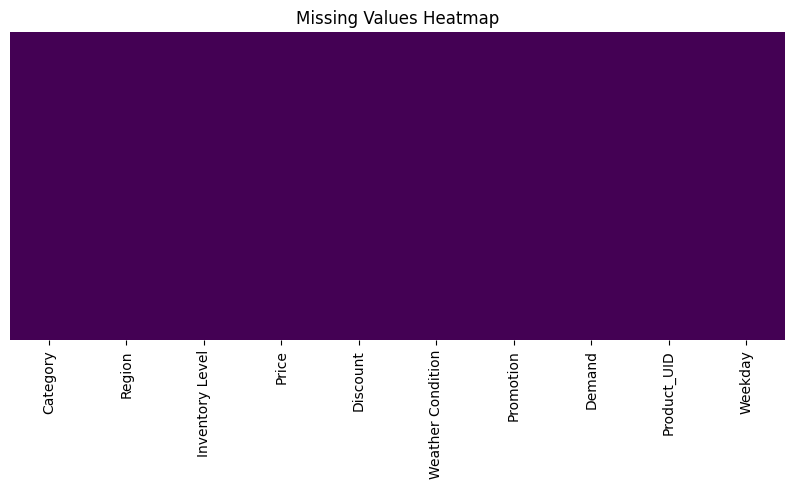

In [35]:
# We visualize this for our presentation
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [36]:
# Count 0s in each column
zero_counts = (df == 0).sum()
print(zero_counts)
# The given 0 values are legimate values, therefore we have no missings in our data
# Units sold and units ordered are always simultaniously 0


Category                0
Region                  0
Inventory Level        53
Price                   0
Discount              368
Weather Condition       0
Promotion            1097
Demand                  0
Product_UID             0
Weekday                 0
dtype: int64


In [37]:
# We store the cleaned data 
df.to_csv("../../Data/Transformed/Leo/inventory_management_cleaned.csv", index=False)

Saved to: ../../Images/Challenge_different_product_types.png


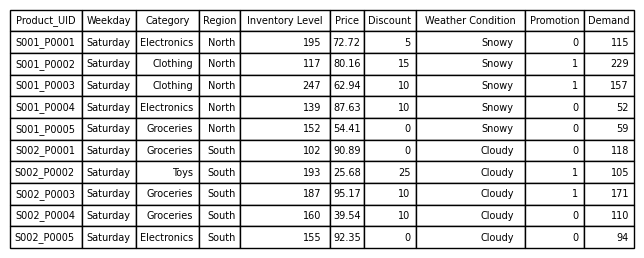

In [38]:
# This only store some data tables for our presentation
import matplotlib.table as tbl
import os

# Load the cleaned dataset
file_path = "../../Data/Transformed/Leo/inventory_management_cleaned.csv"
df = pd.read_csv(file_path)

# Filter for identifiers starting with S001_ and S002_
s001_sample = df[df['Product_UID'].str.startswith('S001_')].head(5)
s002_sample = df[df['Product_UID'].str.startswith('S002_')].head(5)

# Combine and limit to first 10 columns
# Combine the two samples
sample_combined = pd.concat([s001_sample, s002_sample])

# Reorder: Weekday → Product_UID → Rest
cols = sample_combined.columns.tolist()
cols.remove('Weekday')
cols.remove('Product_UID')
new_order = ['Product_UID', 'Weekday'] + cols
sample_combined = sample_combined[new_order]

# Limit to first 15 columns
sample_combined = sample_combined.iloc[:, :15]


# Create figure
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')

# Create table
table = tbl.table(
    ax,
    cellText=sample_combined.values,
    colLabels=sample_combined.columns,
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1.1, 1.3)

# Adjust column widths
try:
    table.auto_set_column_width(col=list(range(sample_combined.shape[1])))
except AttributeError:
    print("auto_set_column_width not available in this matplotlib version")

# Save the image
output_dir = "../../Images"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, "Challenge_different_product_types.png")
plt.savefig(image_path, bbox_inches='tight', dpi=700)

print(f"Saved to: {image_path}")


Saved to: ../../Images/Challenge_different_product_types.png


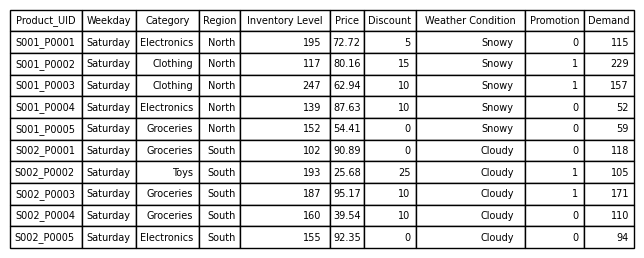

In [39]:
# This only store some data tables for our presentation
import matplotlib.table as tbl
import os

# Load the cleaned dataset
file_path = "../../Data/Transformed/Leo/inventory_management_cleaned.csv"
df = pd.read_csv(file_path)

# Filter for identifiers starting with S001_ and S002_
s001_sample = df[df['Product_UID'].str.startswith('S001_')].head(5)
s002_sample = df[df['Product_UID'].str.startswith('S002_')].head(5)

# Combine and limit to first 10 columns
# Combine the two samples
sample_combined = pd.concat([s001_sample, s002_sample])

# Reorder: Weekday → Product_UID → Rest
cols = sample_combined.columns.tolist()
cols.remove('Weekday')
cols.remove('Product_UID')
new_order = ['Product_UID', 'Weekday'] + cols
sample_combined = sample_combined[new_order]

# Limit to first 15 columns
sample_combined = sample_combined.iloc[:, :15]


# Create figure
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')

# Create table
table = tbl.table(
    ax,
    cellText=sample_combined.values,
    colLabels=sample_combined.columns,
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1.1, 1.3)

# Adjust column widths
try:
    table.auto_set_column_width(col=list(range(sample_combined.shape[1])))
except AttributeError:
    print("auto_set_column_width not available in this matplotlib version")

# Save the image
output_dir = "../../Images"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, "Challenge_different_product_types.png")
plt.savefig(image_path, bbox_inches='tight', dpi=700)

print(f"Saved to: {image_path}")


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.table as tbl
import os

# Load dataset
file_path = "../../Data/Transformed/Leo/inventory_management_cleaned.csv"
df = pd.read_csv(file_path)

# Filter for S001_P0001
product_df = df[df['Product_UID'] == 'S001_P0001']

# Select 5 rows for Saturday and 5 for Sunday
sat_rows = product_df[product_df['Weekday'] == 'Saturday'].head(5)
sun_rows = product_df[product_df['Weekday'] == 'Sunday'].head(5)

# Combine into a single table
table_data = pd.concat([sat_rows, sun_rows])

# Select the first N columns you want to display (adjust as needed)
# e.g. show up to 10–12 relevant columns like in your example
columns_to_show = ['Product_UID', 'Weekday', 'Category', 'Region',
                   'Inventory Level', 'Price', 'Discount',
                   'Weather Condition', 'Promotion', 'Demand']

table_data = table_data[columns_to_show]

# Create figure
fig, ax = plt.subplots(figsize=(10, 2.5))  # Wider for more columns
ax.axis('off')

# Create styled table
table = tbl.table(
    ax,
    cellText=table_data.values,
    colLabels=table_data.columns,
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.3)

# Adjust column widths
try:
    table.auto_set_column_width(col=list(range(table_data.shape[1])))
except AttributeError:
    pass

# Save the image
output_dir = "../../Images"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, "Challenge_Observations_per_PUID.png")
plt.savefig(image_path, bbox_inches='tight', dpi=700)
plt.close()

print(f"Saved to: {image_path}")


Saved to: ../../Images/Challenge_Observations_per_PUID.png
